# Modelling forecast facebook prophet

* Trivial forecasting for total COVID cases
* Cross validation with diagonal plot.

**Forecasting- Facebook Prophet**

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

In [7]:
from prophet import Prophet

**Rolling mean**

In [9]:
df = pd.DataFrame({'X': np.arange(0,10)}) # generate an input df
df['y']=df.rolling(3).mean() # window size of 3 days to calculate mean

In [10]:
df

,X,y
0,0,NaN
1,1,NaN
2,2,1.0
3,3,2.0
4,4,3.0
5,5,4.0
6,6,5.0
7,7,6.0
8,8,7.0
9,9,8.0


**Small data set**

In [11]:
df_all = pd.read_csv(r"C:\Users\jaina\eds_covid-19_analysis\data\processed\COVID_small_flat_table.csv", sep =';')

In [12]:
df_all

,date,Italy,US,Spain,Germany,India,Canada,Russia,Switzerland
0,2020-01-22,0,1,0,0,0,0,0,0
1,2020-01-23,0,1,0,0,0,2,0,0
2,2020-01-24,0,2,0,0,0,3,0,0
3,2020-01-25,0,2,0,0,0,3,0,0
4,2020-01-26,0,5,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...
895,2022-07-05,18938771,88065902,12890002,28673212,43547809,3963521,18176132,3805774
896,2022-07-06,19048788,88262908,12890002,28808614,43566739,3964556,18179254,3805774
897,2022-07-07,19157174,88381589,12890002,28926346,43585554,3973323,18182578,3805774
898,2022-07-08,19259037,88547882,12973615,29022265,43604394,3976889,18185995,3805774


In [14]:
df=df_all[['date','Germany']]
df=df.rename(columns={'date': 'ds',
                        'Germany': 'y'})

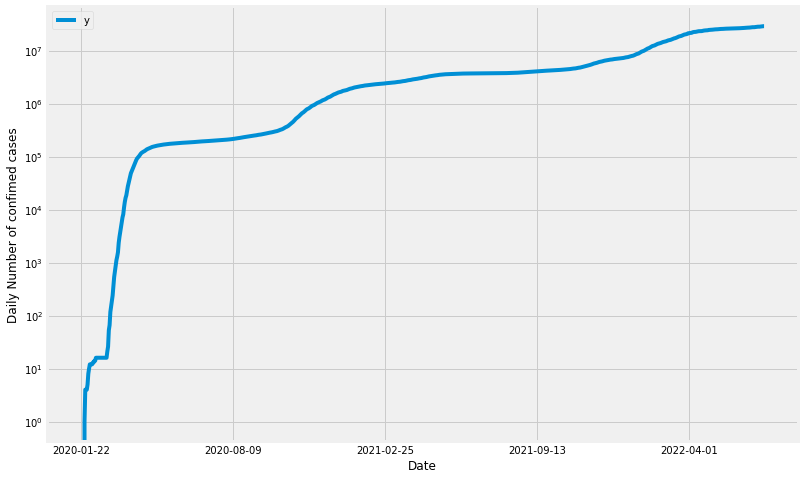

In [15]:
ax = df.set_index('ds').plot(figsize=(12, 8),
                             logy=True) # converting the graph to logarithmic style
ax.set_ylabel('Daily Number of confimed cases')
ax.set_xlabel('Date')

plt.show()

In [16]:
my_model = Prophet(growth='logistic')   # logistic model

In [17]:
my_model

In [18]:
df['cap']=1000000.
my_model.fit(df)

14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future_dates = my_model.make_future_dataframe(periods=7, freq='D')
future_dates['cap']=1000000. # only mandatory for the logistic model
future_dates.tail()

,ds,cap
902,2022-07-12,1000000.0
903,2022-07-13,1000000.0
904,2022-07-14,1000000.0
905,2022-07-15,1000000.0
906,2022-07-16,1000000.0


In [20]:
forecast = my_model.predict(future_dates)

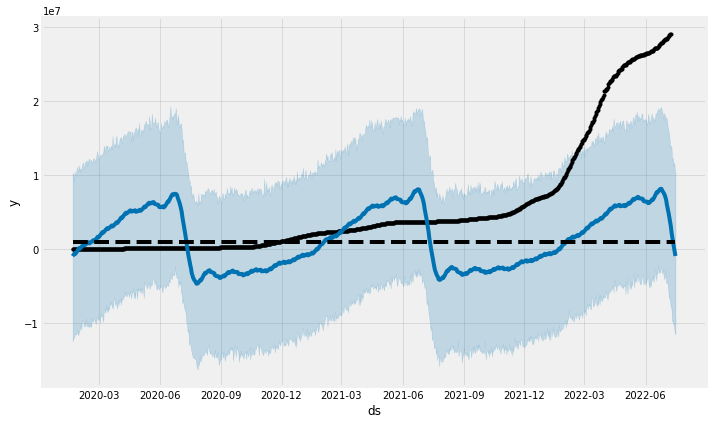

In [24]:
my_model.plot(forecast,
              uncertainty=True ); # since fbprohet is rendering the output

In [27]:
import plotly.offline as py
from prophet.plot import plot_plotly

fig = plot_plotly(my_model, forecast) 

fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,8.5])
py.iplot(fig)

In [28]:
forecast.sort_values(by='ds').head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,125903.361305,1000000.0,-1.238870e+07,1.033550e+07,125903.361305,125903.361305,-1.051491e+06,-1.051491e+06,-1.051491e+06,-899.067919,-899.067919,-899.067919,-1.050592e+06,-1.050592e+06,-1.050592e+06,0.0,0.0,0.0,-925587.522031
1,2020-01-23,127032.794939,1000000.0,-1.207967e+07,1.006315e+07,127032.794939,127032.794939,-9.244551e+05,-9.244551e+05,-9.244551e+05,39366.177536,39366.177536,39366.177536,-9.638213e+05,-9.638213e+05,-9.638213e+05,0.0,0.0,0.0,-797422.299835
2,2020-01-24,128170.874674,1000000.0,-1.186487e+07,9.101761e+06,128170.874674,128170.874674,-7.979333e+05,-7.979333e+05,-7.979333e+05,73945.992184,73945.992184,73945.992184,-8.718793e+05,-8.718793e+05,-8.718793e+05,0.0,0.0,0.0,-669762.402890
3,2020-01-25,129317.640011,1000000.0,-1.168765e+07,1.056028e+07,129317.640011,129317.640011,-6.754016e+05,-6.754016e+05,-6.754016e+05,100274.068554,100274.068554,100274.068554,-7.756756e+05,-7.756756e+05,-7.756756e+05,0.0,0.0,0.0,-546083.913634
4,2020-01-26,130473.130142,1000000.0,-1.125868e+07,9.789793e+06,130473.130142,130473.130142,-7.664194e+05,-7.664194e+05,-7.664194e+05,-90191.369614,-90191.369614,-90191.369614,-6.762280e+05,-6.762280e+05,-6.762280e+05,0.0,0.0,0.0,-635946.259440


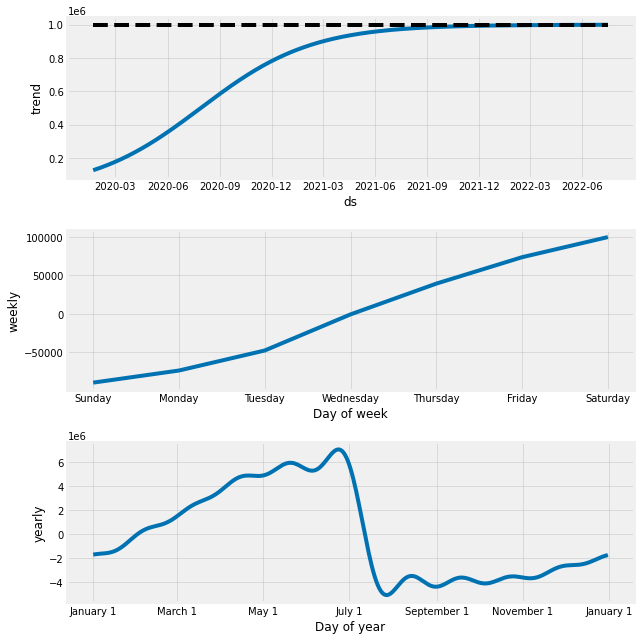

In [29]:
my_model.plot_components(forecast);

<AxesSubplot:xlabel='ds'>

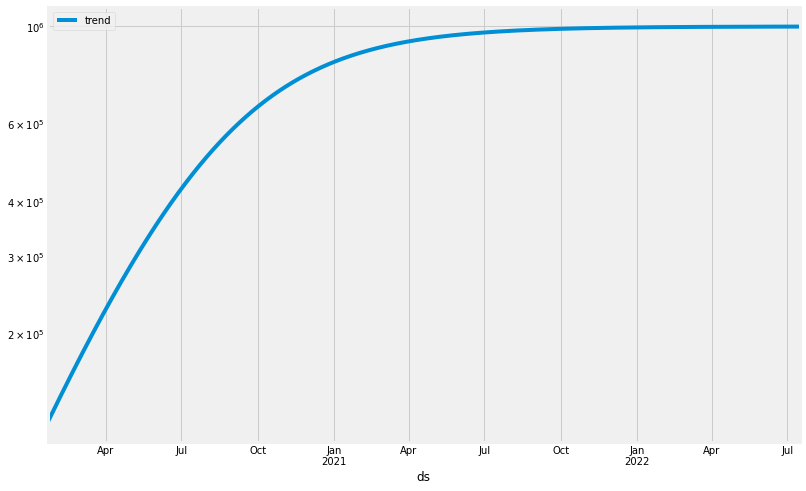

In [30]:
# facebook prophet Model trend
forecast[['ds','trend']].set_index('ds').plot(figsize=(12, 8),logy=True)

**Cross validation**

In [31]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, 
                         initial='40 days', # 30 days for training
                         period='1 days', 
                         horizon = '7 days') # prediction for next 7 days

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/853 [00:00<?, ?it/s]

14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:30:04 - cmdstanpy - INFO - Chain [1] done processing
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
14:30:53 - cmdstanpy - INFO - Chain [1] done processing
14:30:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:35 - cmdstanpy - INFO - Chain [1] done processing
14:31:37 - cmdstanpy - INFO - Chain [1] start processing
14:31:54 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:32:55 - cmdstanpy - INFO - Chain [1] done processing
14:32:57 - cmdstanpy - INFO - Chain [1] start processing
14:33:25 - cmdstanpy - INFO - Chain [1] done processing
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
14:33:41 - cmdstanpy - INFO - Chain [1] done processing
14:33:43 - cmdstanpy - INFO - Chain [1] start processing
14:34:11 - cmdstanpy - INFO - Chain [1] done processing
14:34:14 - cmdstanpy - INFO - Chain [1] start processing
14:34:35 - cmdstanpy - INFO - Chain [1]

14:40:42 - cmdstanpy - INFO - Chain [1] done processing
14:40:45 - cmdstanpy - INFO - Chain [1] start processing
14:40:45 - cmdstanpy - INFO - Chain [1] done processing
14:40:47 - cmdstanpy - INFO - Chain [1] start processing
14:40:47 - cmdstanpy - INFO - Chain [1] done processing
14:40:50 - cmdstanpy - INFO - Chain [1] start processing
14:40:50 - cmdstanpy - INFO - Chain [1] done processing
14:40:52 - cmdstanpy - INFO - Chain [1] start processing
14:40:52 - cmdstanpy - INFO - Chain [1] done processing
14:40:55 - cmdstanpy - INFO - Chain [1] start processing
14:40:55 - cmdstanpy - INFO - Chain [1] done processing
14:40:57 - cmdstanpy - INFO - Chain [1] start processing
14:40:57 - cmdstanpy - INFO - Chain [1] done processing
14:40:59 - cmdstanpy - INFO - Chain [1] start processing
14:40:59 - cmdstanpy - INFO - Chain [1] done processing
14:41:02 - cmdstanpy - INFO - Chain [1] start processing
14:41:02 - cmdstanpy - INFO - Chain [1] done processing
14:41:05 - cmdstanpy - INFO - Chain [1] 

14:43:47 - cmdstanpy - INFO - Chain [1] done processing
14:43:50 - cmdstanpy - INFO - Chain [1] start processing
14:43:50 - cmdstanpy - INFO - Chain [1] done processing
14:43:53 - cmdstanpy - INFO - Chain [1] start processing
14:43:53 - cmdstanpy - INFO - Chain [1] done processing
14:43:55 - cmdstanpy - INFO - Chain [1] start processing
14:43:56 - cmdstanpy - INFO - Chain [1] done processing
14:43:58 - cmdstanpy - INFO - Chain [1] start processing
14:43:58 - cmdstanpy - INFO - Chain [1] done processing
14:44:01 - cmdstanpy - INFO - Chain [1] start processing
14:44:01 - cmdstanpy - INFO - Chain [1] done processing
14:44:04 - cmdstanpy - INFO - Chain [1] start processing
14:44:04 - cmdstanpy - INFO - Chain [1] done processing
14:44:07 - cmdstanpy - INFO - Chain [1] start processing
14:44:07 - cmdstanpy - INFO - Chain [1] done processing
14:44:09 - cmdstanpy - INFO - Chain [1] start processing
14:44:09 - cmdstanpy - INFO - Chain [1] done processing
14:44:12 - cmdstanpy - INFO - Chain [1] 

14:47:12 - cmdstanpy - INFO - Chain [1] done processing
14:47:15 - cmdstanpy - INFO - Chain [1] start processing
14:47:15 - cmdstanpy - INFO - Chain [1] done processing
14:47:18 - cmdstanpy - INFO - Chain [1] start processing
14:47:18 - cmdstanpy - INFO - Chain [1] done processing
14:47:21 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] done processing
14:47:25 - cmdstanpy - INFO - Chain [1] start processing
14:47:26 - cmdstanpy - INFO - Chain [1] done processing
14:47:29 - cmdstanpy - INFO - Chain [1] start processing
14:47:29 - cmdstanpy - INFO - Chain [1] done processing
14:47:32 - cmdstanpy - INFO - Chain [1] start processing
14:47:32 - cmdstanpy - INFO - Chain [1] done processing
14:47:35 - cmdstanpy - INFO - Chain [1] start processing
14:47:35 - cmdstanpy - INFO - Chain [1] done processing
14:47:37 - cmdstanpy - INFO - Chain [1] start processing
14:47:37 - cmdstanpy - INFO - Chain [1] done processing
14:47:39 - cmdstanpy - INFO - Chain [1] 

14:50:26 - cmdstanpy - INFO - Chain [1] done processing
14:50:28 - cmdstanpy - INFO - Chain [1] start processing
14:50:28 - cmdstanpy - INFO - Chain [1] done processing
14:50:31 - cmdstanpy - INFO - Chain [1] start processing
14:50:31 - cmdstanpy - INFO - Chain [1] done processing
14:50:35 - cmdstanpy - INFO - Chain [1] start processing
14:50:35 - cmdstanpy - INFO - Chain [1] done processing
14:50:37 - cmdstanpy - INFO - Chain [1] start processing
14:50:37 - cmdstanpy - INFO - Chain [1] done processing
14:50:39 - cmdstanpy - INFO - Chain [1] start processing
14:50:39 - cmdstanpy - INFO - Chain [1] done processing
14:50:41 - cmdstanpy - INFO - Chain [1] start processing
14:50:41 - cmdstanpy - INFO - Chain [1] done processing
14:50:43 - cmdstanpy - INFO - Chain [1] start processing
14:50:43 - cmdstanpy - INFO - Chain [1] done processing
14:50:46 - cmdstanpy - INFO - Chain [1] start processing
14:50:46 - cmdstanpy - INFO - Chain [1] done processing
14:50:48 - cmdstanpy - INFO - Chain [1] 

14:53:18 - cmdstanpy - INFO - Chain [1] done processing
14:53:20 - cmdstanpy - INFO - Chain [1] start processing
14:53:20 - cmdstanpy - INFO - Chain [1] done processing
14:53:23 - cmdstanpy - INFO - Chain [1] start processing
14:53:23 - cmdstanpy - INFO - Chain [1] done processing
14:53:25 - cmdstanpy - INFO - Chain [1] start processing
14:53:25 - cmdstanpy - INFO - Chain [1] done processing
14:53:27 - cmdstanpy - INFO - Chain [1] start processing
14:53:27 - cmdstanpy - INFO - Chain [1] done processing
14:53:30 - cmdstanpy - INFO - Chain [1] start processing
14:53:30 - cmdstanpy - INFO - Chain [1] done processing
14:53:32 - cmdstanpy - INFO - Chain [1] start processing
14:53:32 - cmdstanpy - INFO - Chain [1] done processing
14:53:34 - cmdstanpy - INFO - Chain [1] start processing
14:53:34 - cmdstanpy - INFO - Chain [1] done processing
14:53:37 - cmdstanpy - INFO - Chain [1] start processing
14:53:37 - cmdstanpy - INFO - Chain [1] done processing
14:53:39 - cmdstanpy - INFO - Chain [1] 

14:56:23 - cmdstanpy - INFO - Chain [1] done processing
14:56:26 - cmdstanpy - INFO - Chain [1] start processing
14:56:26 - cmdstanpy - INFO - Chain [1] done processing
14:56:28 - cmdstanpy - INFO - Chain [1] start processing
14:56:28 - cmdstanpy - INFO - Chain [1] done processing
14:56:30 - cmdstanpy - INFO - Chain [1] start processing
14:56:30 - cmdstanpy - INFO - Chain [1] done processing
14:56:32 - cmdstanpy - INFO - Chain [1] start processing
14:56:33 - cmdstanpy - INFO - Chain [1] done processing
14:56:35 - cmdstanpy - INFO - Chain [1] start processing
14:56:35 - cmdstanpy - INFO - Chain [1] done processing
14:56:37 - cmdstanpy - INFO - Chain [1] start processing
14:56:37 - cmdstanpy - INFO - Chain [1] done processing
14:56:40 - cmdstanpy - INFO - Chain [1] start processing
14:56:40 - cmdstanpy - INFO - Chain [1] done processing
14:56:42 - cmdstanpy - INFO - Chain [1] start processing
14:56:42 - cmdstanpy - INFO - Chain [1] done processing
14:56:45 - cmdstanpy - INFO - Chain [1] 

14:59:31 - cmdstanpy - INFO - Chain [1] done processing
14:59:34 - cmdstanpy - INFO - Chain [1] start processing
14:59:34 - cmdstanpy - INFO - Chain [1] done processing
14:59:36 - cmdstanpy - INFO - Chain [1] start processing
14:59:36 - cmdstanpy - INFO - Chain [1] done processing
14:59:38 - cmdstanpy - INFO - Chain [1] start processing
14:59:38 - cmdstanpy - INFO - Chain [1] done processing
14:59:41 - cmdstanpy - INFO - Chain [1] start processing
14:59:41 - cmdstanpy - INFO - Chain [1] done processing
14:59:43 - cmdstanpy - INFO - Chain [1] start processing
14:59:43 - cmdstanpy - INFO - Chain [1] done processing
14:59:46 - cmdstanpy - INFO - Chain [1] start processing
14:59:46 - cmdstanpy - INFO - Chain [1] done processing
14:59:49 - cmdstanpy - INFO - Chain [1] start processing
14:59:49 - cmdstanpy - INFO - Chain [1] done processing
14:59:51 - cmdstanpy - INFO - Chain [1] start processing
14:59:51 - cmdstanpy - INFO - Chain [1] done processing
14:59:53 - cmdstanpy - INFO - Chain [1] 

15:02:36 - cmdstanpy - INFO - Chain [1] done processing
15:02:39 - cmdstanpy - INFO - Chain [1] start processing
15:02:39 - cmdstanpy - INFO - Chain [1] done processing
15:02:42 - cmdstanpy - INFO - Chain [1] start processing
15:02:42 - cmdstanpy - INFO - Chain [1] done processing
15:02:45 - cmdstanpy - INFO - Chain [1] start processing
15:02:45 - cmdstanpy - INFO - Chain [1] done processing
15:02:48 - cmdstanpy - INFO - Chain [1] start processing
15:02:48 - cmdstanpy - INFO - Chain [1] done processing
15:02:51 - cmdstanpy - INFO - Chain [1] start processing
15:02:51 - cmdstanpy - INFO - Chain [1] done processing
15:02:54 - cmdstanpy - INFO - Chain [1] start processing
15:02:54 - cmdstanpy - INFO - Chain [1] done processing
15:02:56 - cmdstanpy - INFO - Chain [1] start processing
15:02:57 - cmdstanpy - INFO - Chain [1] done processing
15:02:59 - cmdstanpy - INFO - Chain [1] start processing
15:02:59 - cmdstanpy - INFO - Chain [1] done processing
15:03:02 - cmdstanpy - INFO - Chain [1] 

15:05:47 - cmdstanpy - INFO - Chain [1] done processing
15:05:49 - cmdstanpy - INFO - Chain [1] start processing
15:05:49 - cmdstanpy - INFO - Chain [1] done processing
15:05:52 - cmdstanpy - INFO - Chain [1] start processing
15:05:52 - cmdstanpy - INFO - Chain [1] done processing
15:05:55 - cmdstanpy - INFO - Chain [1] start processing
15:05:55 - cmdstanpy - INFO - Chain [1] done processing
15:05:58 - cmdstanpy - INFO - Chain [1] start processing
15:05:58 - cmdstanpy - INFO - Chain [1] done processing
15:06:01 - cmdstanpy - INFO - Chain [1] start processing
15:06:01 - cmdstanpy - INFO - Chain [1] done processing
15:06:03 - cmdstanpy - INFO - Chain [1] start processing
15:06:03 - cmdstanpy - INFO - Chain [1] done processing
15:06:06 - cmdstanpy - INFO - Chain [1] start processing
15:06:06 - cmdstanpy - INFO - Chain [1] done processing
15:06:09 - cmdstanpy - INFO - Chain [1] start processing
15:06:09 - cmdstanpy - INFO - Chain [1] done processing
15:06:11 - cmdstanpy - INFO - Chain [1] 

15:09:00 - cmdstanpy - INFO - Chain [1] done processing
15:09:03 - cmdstanpy - INFO - Chain [1] start processing
15:09:03 - cmdstanpy - INFO - Chain [1] done processing
15:09:05 - cmdstanpy - INFO - Chain [1] start processing
15:09:05 - cmdstanpy - INFO - Chain [1] done processing
15:09:08 - cmdstanpy - INFO - Chain [1] start processing
15:09:08 - cmdstanpy - INFO - Chain [1] done processing
15:09:10 - cmdstanpy - INFO - Chain [1] start processing
15:09:10 - cmdstanpy - INFO - Chain [1] done processing
15:09:13 - cmdstanpy - INFO - Chain [1] start processing
15:09:13 - cmdstanpy - INFO - Chain [1] done processing
15:09:16 - cmdstanpy - INFO - Chain [1] start processing
15:09:16 - cmdstanpy - INFO - Chain [1] done processing
15:09:19 - cmdstanpy - INFO - Chain [1] start processing
15:09:19 - cmdstanpy - INFO - Chain [1] done processing
15:09:22 - cmdstanpy - INFO - Chain [1] start processing
15:09:22 - cmdstanpy - INFO - Chain [1] done processing
15:09:24 - cmdstanpy - INFO - Chain [1] 

15:12:06 - cmdstanpy - INFO - Chain [1] done processing
15:12:08 - cmdstanpy - INFO - Chain [1] start processing
15:12:08 - cmdstanpy - INFO - Chain [1] done processing
15:12:10 - cmdstanpy - INFO - Chain [1] start processing
15:12:10 - cmdstanpy - INFO - Chain [1] done processing
15:12:12 - cmdstanpy - INFO - Chain [1] start processing
15:12:12 - cmdstanpy - INFO - Chain [1] done processing
15:12:14 - cmdstanpy - INFO - Chain [1] start processing
15:12:14 - cmdstanpy - INFO - Chain [1] done processing
15:12:17 - cmdstanpy - INFO - Chain [1] start processing
15:12:17 - cmdstanpy - INFO - Chain [1] done processing
15:12:19 - cmdstanpy - INFO - Chain [1] start processing
15:12:19 - cmdstanpy - INFO - Chain [1] done processing
15:12:21 - cmdstanpy - INFO - Chain [1] start processing
15:12:21 - cmdstanpy - INFO - Chain [1] done processing
15:12:23 - cmdstanpy - INFO - Chain [1] start processing
15:12:24 - cmdstanpy - INFO - Chain [1] done processing
15:12:26 - cmdstanpy - INFO - Chain [1] 

In [32]:
df_cv.sort_values(by=['cutoff','ds'])[0:14]
df_cv.head(10)
# here 2nd february will use the historic data to predict next seven days and same continues with other dates

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-03,209.497127,206.873403,212.130661,188,2020-03-02
1,2020-03-04,278.613218,275.372932,281.542967,240,2020-03-02
2,2020-03-05,362.477181,358.660839,366.249875,349,2020-03-02
3,2020-03-06,465.973276,460.412949,470.871949,534,2020-03-02
4,2020-03-07,583.659417,576.400047,590.674926,684,2020-03-02
5,2020-03-08,725.589738,716.093952,733.918200,847,2020-03-02
6,2020-03-09,881.140448,868.982675,891.946610,1112,2020-03-02
7,2020-03-04,222.818337,217.759048,226.544641,240,2020-03-03
8,2020-03-05,252.106416,231.397032,268.991479,349,2020-03-03
9,2020-03-06,298.882107,258.624356,335.768460,534,2020-03-03


In [33]:
df[['ds','y']][30:]

,ds,y
30,2020-02-21,16
31,2020-02-22,16
32,2020-02-23,16
33,2020-02-24,16
34,2020-02-25,16
...,...,...
895,2022-07-05,28673212
896,2022-07-06,28808614
897,2022-07-07,28926346
898,2022-07-08,29022265


In [34]:
df_cv.sort_values(by=['cutoff','ds'])[0:12]
df_cv.head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-03,209.497127,206.873403,212.130661,188,2020-03-02
1,2020-03-04,278.613218,275.372932,281.542967,240,2020-03-02
2,2020-03-05,362.477181,358.660839,366.249875,349,2020-03-02
3,2020-03-06,465.973276,460.412949,470.871949,534,2020-03-02
4,2020-03-07,583.659417,576.400047,590.674926,684,2020-03-02
5,2020-03-08,725.589738,716.093952,733.918200,847,2020-03-02
6,2020-03-09,881.140448,868.982675,891.946610,1112,2020-03-02
7,2020-03-04,222.818337,217.759048,226.544641,240,2020-03-03
8,2020-03-05,252.106416,231.397032,268.991479,349,2020-03-03
9,2020-03-06,298.882107,258.624356,335.768460,534,2020-03-03


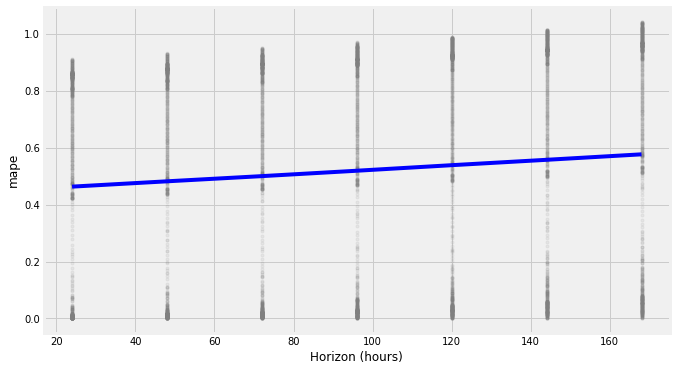

In [37]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape',)
# Initially the error is 42% whreas, it is 58% at the end 

**Diagonalplot**

In [39]:
horizon='7 days'
df_cv['horizon']=df_cv.ds-df_cv.cutoff

date_vec=df_cv[df_cv['horizon']==horizon]['ds']
y_hat=df_cv[df_cv['horizon']==horizon]['yhat']
y=df_cv[df_cv['horizon']==horizon]['y']

In [40]:
df_cv_7=df_cv[df_cv['horizon']==horizon]
df_cv_7.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,horizon
5942,2022-07-05,-635941.592760,-1.086413e+07,9.664098e+06,28673212,2022-06-28,7 days
5949,2022-07-06,-654474.082979,-1.105674e+07,9.067030e+06,28808614,2022-06-29,7 days
5956,2022-07-07,-661849.025141,-1.070758e+07,9.065690e+06,28926346,2022-06-30,7 days
5963,2022-07-08,-685667.334625,-1.143316e+07,9.468749e+06,29022265,2022-07-01,7 days
5970,2022-07-09,-716138.311526,-1.105099e+07,9.912432e+06,29022265,2022-07-02,7 days


In [41]:
type(df_cv['horizon'][0])

pandas._libs.tslibs.timedeltas.Timedelta

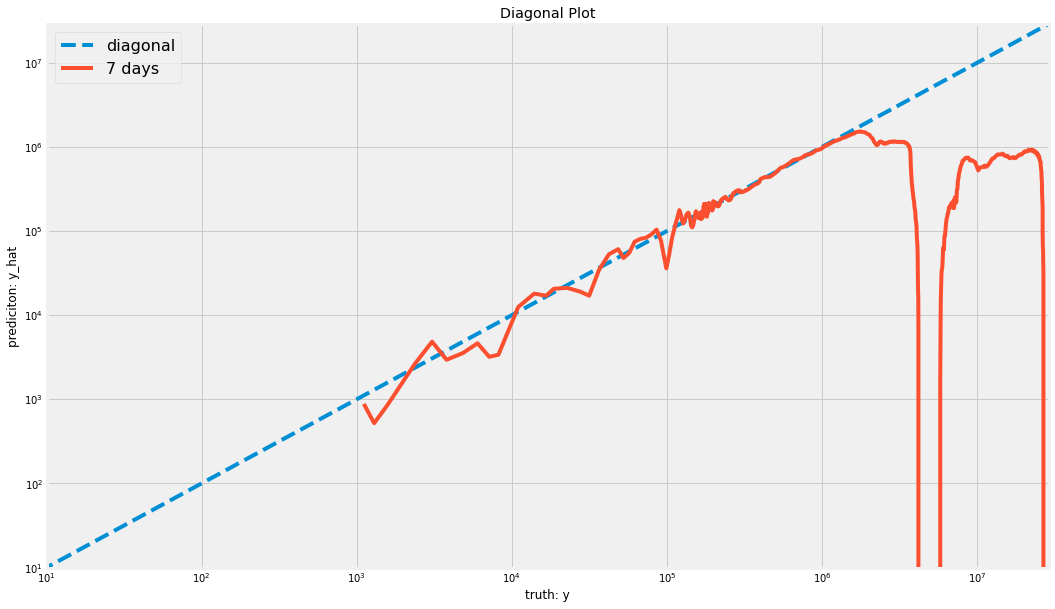

In [42]:
fig, ax = plt.subplots(1, 1)


ax.plot(np.arange(max(y)),np.arange(max(y)),'--',label='diagonal')
ax.plot(y,y_hat,'-',label=horizon)  # horizon is a np.timedelta objct

ax.set_title('Diagonal Plot')
ax.set_ylim(10, max(y))

ax.set_xlabel('truth: y')
ax.set_ylabel('prediciton: y_hat')
ax.set_yscale('log')

ax.set_xlim(10, max(y))
ax.set_xscale('log')
ax.legend(loc='best',
           prop={'size': 16});

**Trivial Forecast**

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    ''' MAPE calculation '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [47]:
parse_dates=['date']
df_all = pd.read_csv(r"C:\Users\jaina\eds_covid-19_analysis\data\processed\COVID_small_flat_table.csv",sep=';',parse_dates=parse_dates)
df_trivial=df_all[['date','Italy']]
df_trivial=df_trivial.rename(columns={'date': 'ds',
                        'Italy': 'y'})

**Rolling Mean forecast**

In [49]:
df_trivial['y_mean_r3']=df_trivial.y.rolling(3).mean()          # average of 3 days

In [50]:
df_trivial['cutoff']=df_trivial['ds'].shift(7)
df_trivial['y_hat']=df_trivial['y_mean_r3'].shift(7)
df_trivial['horizon']=df_trivial['ds']-df_trivial['cutoff']
print('MAPE: '+str(mean_absolute_percentage_error(df_trivial['y_hat'].iloc[12:,], df_trivial['y'].iloc[12:,])))
df_trivial

MAPE: inf


C:\Users\jaina\AppData\Local\Temp\ipykernel_11936\4261418569.py:4: RuntimeWarning:

divide by zero encountered in true_divide



,ds,y,y_mean_r3,cutoff,y_hat,horizon
0,2020-01-22,0,NaN,NaT,NaN,NaT
1,2020-01-23,0,NaN,NaT,NaN,NaT
2,2020-01-24,0,0.000000e+00,NaT,NaN,NaT
3,2020-01-25,0,0.000000e+00,NaT,NaN,NaT
4,2020-01-26,0,0.000000e+00,NaT,NaN,NaT
...,...,...,...,...,...,...
895,2022-07-05,18938771,1.883780e+07,2022-06-28,1.827898e+07,7 days
896,2022-07-06,19048788,1.893110e+07,2022-06-29,1.834719e+07,7 days
897,2022-07-07,19157174,1.904824e+07,2022-06-30,1.843514e+07,7 days
898,2022-07-08,19259037,1.915500e+07,2022-07-01,1.852400e+07,7 days
